In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
np.random.seed(10)
from sklearn.datasets import make_blobs
X,y=make_blobs(1500,n_features=2,centers=4,random_state=0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss

In [39]:
print(X.shape,y.shape)
np.unique(y)

(1500, 2) (1500,)


array([0, 1, 2, 3])

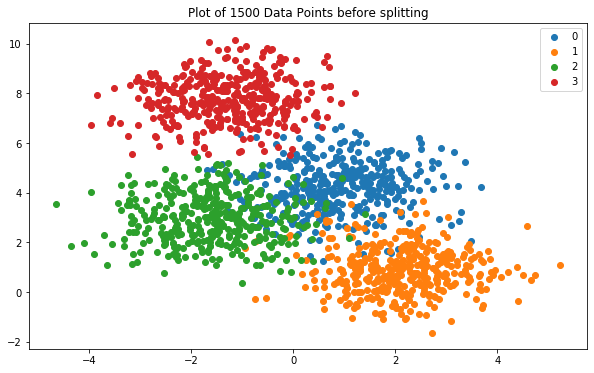

In [40]:
pl.figure(figsize=(10,6))
for cls in np.unique(y):
    pl.scatter(X[y==cls,0],X[y==cls,1],label=cls)
    pl.legend()
pl.title("Plot of "+str(len(X))+" Data Points before splitting")
pl.show()

In [41]:
y=np.mod(y,2)
np.unique(y)

array([0, 1], dtype=int32)

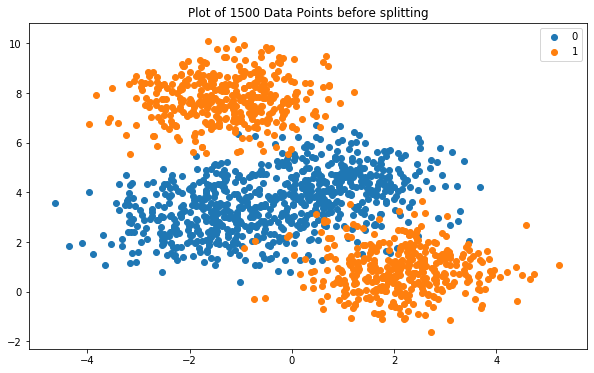

In [42]:
pl.figure(figsize=(10,6))
for cls in np.unique(y):
    pl.scatter(X[y==cls,0],X[y==cls,1],label=cls)
    pl.legend()
pl.title("Plot of "+str(len(X))+" Data Points before splitting")
pl.show()

In [43]:
weights1=np.arange(4).reshape(2,2)
weights2=np.array([3,3]).reshape(2,1)
print(weights1,weights2)

[[0 1]
 [2 3]] [[3]
 [3]]


In [44]:
class Multi_N:
    def __init__(self,layers=[2,2,1]):
        self.input_layers,self.hidden_layers,self.output_layers=layers
        
        self.Weights1=np.random.randn(self.hidden_layers,self.input_layers)
        self.Bias1=np.random.randn(self.hidden_layers).reshape(-1,1)
        
        self.Weights2=np.random.randn(self.output_layers,self.hidden_layers)
        self.Bias2=np.random.randn(self.output_layers).reshape(-1,1)
        
    def Forward_Formula(self,X,W,B):
        z=np.dot(X,W.T)+B.T
        return z.astype(np.float32)
        
    def Sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))

    def loss(self,Y_original,Y_predicted):
#         print(Y_original.shape,Y_predicted.shape)
        loss=(0.5*mean_squared_error(Y_original,Y_predicted))
        return loss
        
    def Forward(self,X):
        self.A1=self.Forward_Formula(X,self.Weights1,self.Bias1)
        self.H1=self.Sigmoid(self.A1)
        
        self.A2=self.Forward_Formula(self.H1,self.Weights2,self.Bias2)
        self.H2=self.Sigmoid(self.A2)
        return self.H2
    
    def Gradient(self,X,Y):
        Y=Y.reshape(-1,1) if (Y.ndim==1) else Y
        Y_predicted=self.Forward(X)
        
#         //derivatives from output to hidden
        self.DA2=(((Y_predicted-Y)*Y_predicted*(1-Y_predicted)))
        self.DW2=self.DA2.T.dot(self.H1)
        self.DB2=self.DA2.sum(axis=0).reshape(-1,1)
        
        
#         //derivatives from hidden to input
        self.DA1=self.DA2*(self.Weights2)*self.H1*(1-self.H1)
        self.DW1=(self.DA1).sum(axis=0).reshape(-1,1)*self.Weights1
        self.DB1=(self.DA1).sum(axis=0).reshape(-1,1)
        return Y_predicted
    
    def fit(self,X,Y,epochs=1,lr=1.0,rand_init=True):
        Y=Y.reshape(-1,1) if(Y.ndim==1) else Y
        mse_lists=[]
        min_batch_size=X.shape[0]
        
        for i in range(epochs):
            Y_predicted=self.Gradient(X,Y)
            mse=self.loss(Y,Y_predicted)
            mse_lists.append(mse)
            self.Weights2=self.Weights2-lr*(self.DW2/min_batch_size)
            self.Bias2=self.Bias2-lr*(self.DB2/min_batch_size)
            self.Weights1=self.Weights1-lr*(self.DW1/min_batch_size)
            self.Bias1=self.Bias1-lr*(self.DB1/min_batch_size)
        self.plot_contour(X,Y)
        return mse_lists
    def predict(self,X,thresh=0.5):
        Y_pred=self.Forward(X)
        return(Y_pred>thresh).astype(int).ravel()
    
    def plot_contour(self, X, Y):
        
        min_vals = [a-1 if a<0 else a+1 for a in X.min(axis=0)]
        max_vals = [a+1 if a>0 else a-1 for a in X.max(axis=0)]
        
        X1 = np.linspace(min_vals[0], max_vals[0], 100)
        X2 = np.linspace(min_vals[1], max_vals[1], 100)
        
        m = X1.shape[0]
        n = X2.shape[0]
        
        X1n, X2m = np.meshgrid(X1, X2)
        Y_mesh = np.zeros((n,m))
        
        for i in range(n):
            for j in range(m):
                Y_mesh[i, j] = self.predict(np.array([X1n[i, j], X2m[i, j]]))[0]
        
        pl.figure(figsize=(8,6))
        pl.grid(True)
        pl.title("Learned decision boundary")
        pl.contourf(X1n, X2m, Y_mesh, alpha=0.3)
        pl.scatter(X[:,0], X[:,1], c=Y.ravel())
        pl.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
print(X_train.shape, y_train.shape)

(1125, 2) (1125,)


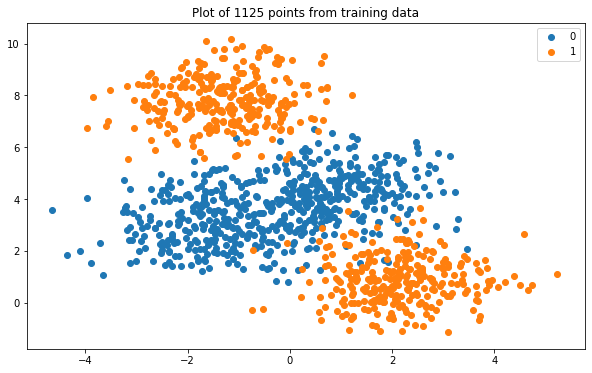

In [46]:
#plotting the train split data coloured by their class labels(2 classes)
pl.figure(figsize=(10,6))

for cls in np.unique(y_train):
    pl.scatter(X_train[y_train==cls,0], X_train[y_train==cls,1], label=cls)
pl.title("Plot of "+str(X_train.shape[0])+" points from training data")
pl.legend()
pl.show()

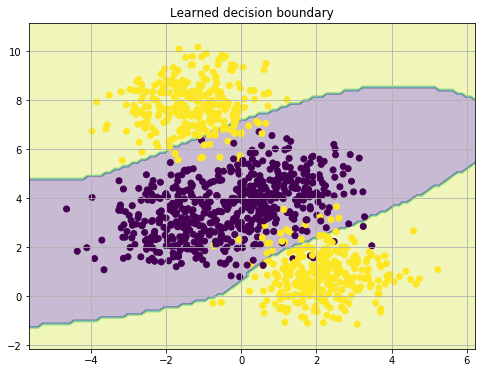

In [51]:
epoch=100000
lr=0.01
ffn=Multi_N([2,10,1])
loss_list=ffn.fit(X_train,y_train,epochs=epoch,lr=lr)
y_train_pred=ffn.predict(X_train)


In [52]:
train_accu=str(accuracy_score(y_train,y_train_pred))

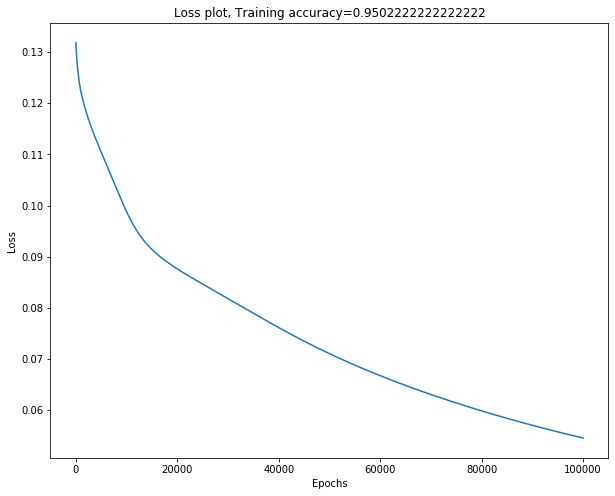

In [53]:
pl.figure(figsize=(10,8))
pl.plot(loss_list)
pl.title("Loss plot, Training accuracy="+train_accu)
pl.xlabel("Epochs")
pl.ylabel("Loss")
pl.show()

Test accuracy: 0.9502222222222222


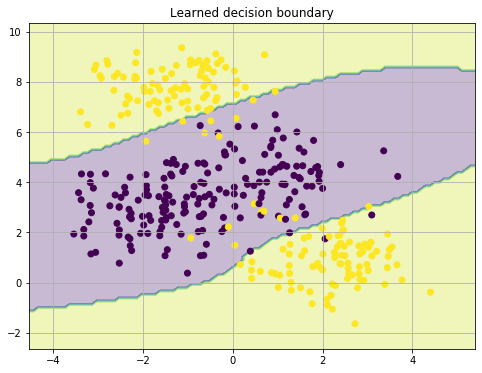

In [54]:
y_test_pred = ffn.predict(X_test)
test_accu = accuracy_score(y_train, y_train_pred)

print("Test accuracy:", test_accu)
ffn.plot_contour(X_test, y_test)